In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bell_Amundsen_Extent = pd.read_excel(filepath, sheet_name='Bell-Amundsen-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Bell_Amundsen_Extent)
fp.date_time(Bell_Amundsen_Extent)

Extent       Date
0    1179855.894 1979-01-01
1     879585.254 1979-02-01
2     791619.096 1979-03-01
3    1254912.071 1979-04-01
4    1620142.247 1979-05-01
..           ...        ...
533  1556568.455 2023-06-01
534  1917507.979 2023-07-01
535  2601630.327 2023-08-01
536  2534223.780 2023-09-01
537  2373004.525 2023-10-01

[538 rows x 2 columns]

In [5]:
scaler = MinMaxScaler()
Bell_Amundsen_Extent['Extent'] = scaler.fit_transform(Bell_Amundsen_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 2
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Bell_Amundsen_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((525, 12, 1), (525,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Bell_Amund_model_LT2/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
47/53 [=========================>....] - ETA: 0s - loss: 0.2554 - root_mean_squared_error: 0.5054

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 8s 99ms/step - loss: 0.2496 - root_mean_squared_error: 0.4996 - val_loss: 0.2444 - val_root_mean_squared_error: 0.4944
Epoch 2/50
52/53 [============================>.] - ETA: 0s - loss: 0.1947 - root_mean_squared_error: 0.4412

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.1964 - root_mean_squared_error: 0.4432 - val_loss: 0.2166 - val_root_mean_squared_error: 0.4654
Epoch 3/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1569 - root_mean_squared_error: 0.3961

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 4s 81ms/step - loss: 0.1620 - root_mean_squared_error: 0.4025 - val_loss: 0.1824 - val_root_mean_squared_error: 0.4270
Epoch 4/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1346 - root_mean_squared_error: 0.3668

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.1337 - root_mean_squared_error: 0.3657 - val_loss: 0.1522 - val_root_mean_squared_error: 0.3901
Epoch 5/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1066 - root_mean_squared_error: 0.3265

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.1083 - root_mean_squared_error: 0.3291 - val_loss: 0.1245 - val_root_mean_squared_error: 0.3528
Epoch 6/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0908 - root_mean_squared_error: 0.3013

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 4s 81ms/step - loss: 0.0871 - root_mean_squared_error: 0.2951 - val_loss: 0.1007 - val_root_mean_squared_error: 0.3173
Epoch 7/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0699 - root_mean_squared_error: 0.2644

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0688 - root_mean_squared_error: 0.2622 - val_loss: 0.0821 - val_root_mean_squared_error: 0.2866
Epoch 8/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0486 - root_mean_squared_error: 0.2205

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0535 - root_mean_squared_error: 0.2312 - val_loss: 0.0661 - val_root_mean_squared_error: 0.2571
Epoch 9/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0379 - root_mean_squared_error: 0.1948

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0397 - root_mean_squared_error: 0.1993 - val_loss: 0.0541 - val_root_mean_squared_error: 0.2326
Epoch 10/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0327 - root_mean_squared_error: 0.1809

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0313 - root_mean_squared_error: 0.1770 - val_loss: 0.0408 - val_root_mean_squared_error: 0.2020
Epoch 11/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0243 - root_mean_squared_error: 0.1558

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0248 - root_mean_squared_error: 0.1576 - val_loss: 0.0318 - val_root_mean_squared_error: 0.1782
Epoch 12/50
53/53 [==============================] - ETA: 0s - loss: 0.0181 - root_mean_squared_error: 0.1346

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 4s 81ms/step - loss: 0.0181 - root_mean_squared_error: 0.1346 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1534
Epoch 13/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0139 - root_mean_squared_error: 0.1178

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0145 - root_mean_squared_error: 0.1206 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1319
Epoch 14/50
53/53 [==============================] - ETA: 0s - loss: 0.0131 - root_mean_squared_error: 0.1147

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0131 - root_mean_squared_error: 0.1147 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1119
Epoch 15/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0120 - root_mean_squared_error: 0.1096 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1195
Epoch 16/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0162 - root_mean_squared_error: 0.1271

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0161 - root_mean_squared_error: 0.1270 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1077
Epoch 17/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0130 - root_mean_squared_error: 0.1139

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 4s 81ms/step - loss: 0.0134 - root_mean_squared_error: 0.1156 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1004
Epoch 18/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0126 - root_mean_squared_error: 0.1121 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1020
Epoch 19/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0111 - root_mean_squared_error: 0.1053 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1011
Epoch 20/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0121 - root_mean_squared_error: 0.1102 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1065
Epoch 21/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0139 - root_mean_squared_error: 0.1179

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 4s 81ms/step - loss: 0.0142 - root_mean_squared_error: 0.1190 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0963
Epoch 22/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0125 - root_mean_squared_error: 0.1116 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1061
Epoch 23/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0117 - root_mean_squared_error: 0.1083 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0992
Epoch 24/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0143 - root_mean_squared_error: 0.1194 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1110
Epoch 25/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0105 - root_mean_squared_error: 0.1025 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1033
Epoch 26/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0091 - root_mean_squared_error: 0.0954

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0098 - root_mean_squared_error: 0.0992 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0958
Epoch 27/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0132 - root_mean_squared_error: 0.1147 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1249
Epoch 28/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0129 - root_mean_squared_error: 0.1137 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0959
Epoch 29/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0102 - root_mean_squared_error: 0.1011 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1156
Epoch 30/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0112 - root_mean_squared_error: 0.1057 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0960
Epoch 31/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0132 - root_mean_squared_error: 0.1147 - val_loss: 0.0092 - val_root_mean_squared

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 4s 77ms/step - loss: 0.0107 - root_mean_squared_error: 0.1034 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0937
Epoch 33/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0139 - root_mean_squared_error: 0.1181 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1094
Epoch 34/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0133 - root_mean_squared_error: 0.1151 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1046
Epoch 35/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0129 - root_mean_squared_error: 0.1136 - val_loss: 0.0139 - val_root_mean_squared_error: 0.1181
Epoch 36/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0127 - root_mean_squared_error: 0.1125 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0957
Epoch 37/50
52/53 [============================>.] - ETA: 0s - loss: 0.0101 - root_mean_squared_error: 0.1006

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0104 - root_mean_squared_error: 0.1020 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0932
Epoch 38/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0111 - root_mean_squared_error: 0.1056 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1231
Epoch 39/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0103 - root_mean_squared_error: 0.1013 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0969
Epoch 40/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0117 - root_mean_squared_error: 0.1081 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1036
Epoch 41/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0101 - root_mean_squared_error: 0.1006

INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT2\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0102 - root_mean_squared_error: 0.1010 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0932
Epoch 42/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0118 - root_mean_squared_error: 0.1085 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1182
Epoch 43/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0112 - root_mean_squared_error: 0.1060 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1042
Epoch 44/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0121 - root_mean_squared_error: 0.1100 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0981
Epoch 45/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0110 - root_mean_squared_error: 0.1049 - val_loss: 0.0160 - val_root_mean_squared_error: 0.1265
Epoch 46/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0129 - root_mean_squared_error: 0.1137 - val_loss: 0.0087 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.7999698440233867 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

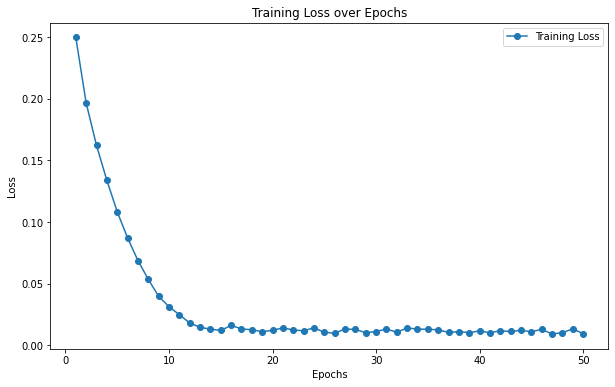

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

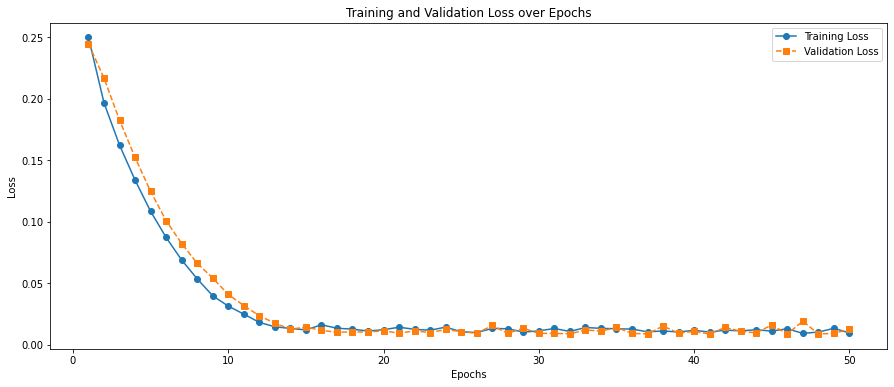

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Bell_Amund_model_LT2/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.09480808644874046
MAE : 0.07507181325358733


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

Train Predictions  Actual Extent
0        1.621772e+06    1575894.445
1        2.042522e+06    1714381.703
2        2.211598e+06    2067343.547
3        2.202988e+06    1856673.675
4        1.929005e+06    1914289.680
5        1.538451e+06    1802244.842
6        1.019025e+06    1202791.069
7        7.338402e+05     752834.272
8        3.328690e+05     451914.219
9        4.372623e+05     439855.813
10       6.638708e+05     807857.307
11       9.859300e+05    1184280.145
12       1.464804e+06    1468308.405
13       1.849792e+06    1540851.607
14       1.995448e+06    1989099.836
15       1.951901e+06    2096990.761
16       1.769358e+06    2080961.032
17       1.726039e+06    1695704.661
18       1.360970e+06    1533888.370
19       7.838689e+05    1038332.675
20       4.842213e+05     602954.621
21       3.266005e+05     895484.288
22       6.786591e+05    1070622.700
23       8.509656e+05    1532457.922
24       1.384456e+06    1703762.123
25       1.760676e+06    1855079.122
26       1.884340e+06    2291960.639
27       1.841734e+06    2114120.417
28       1.781350e+06    1995818.759
29       1.538890e+06    1653379.997
30       1.075878e+06    1070814.995
31       7.652457e+05     689443.815
32       5.195496e+05     401148.663
33       6.392682e+05     346558.057
34       9.555861e+05     599477.678
35       1.131030e+06     765764.905
36       1.597517e+06    1304133.179
37       1.763768e+06    1598436.099
38       2.034440e+06    1763844.414
39       2.101831e+06    1979139.524
40       1.961457e+06    1937348.663
41       1.663836e+06    1833093.342
42       1.349486e+06    1089676.114
43       8.385262e+05     453484.731
44       2.878650e+05     251559.554
45       4.194418e+05     351294.657
46       5.716492e+05     702389.714
47       9.773456e+05    1185169.054
48       1.410493e+06    1556568.455
49       1.911686e+06    1917507.979
50       1.937238e+06    2601630.327
51       2.103270e+06    2534223.780
52       2.077469e+06    2373004.525

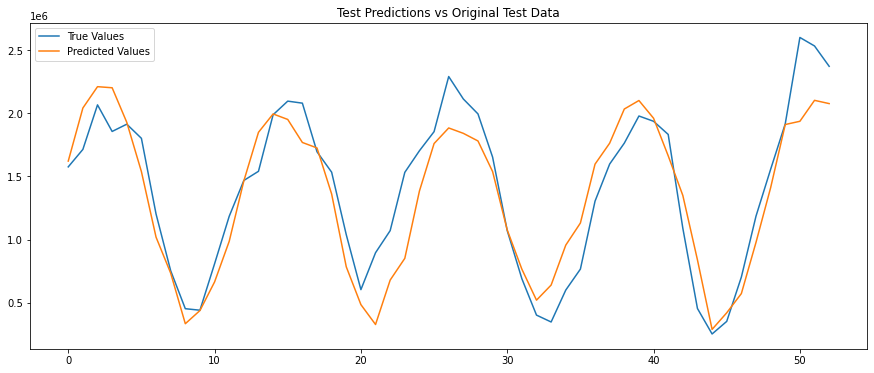

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

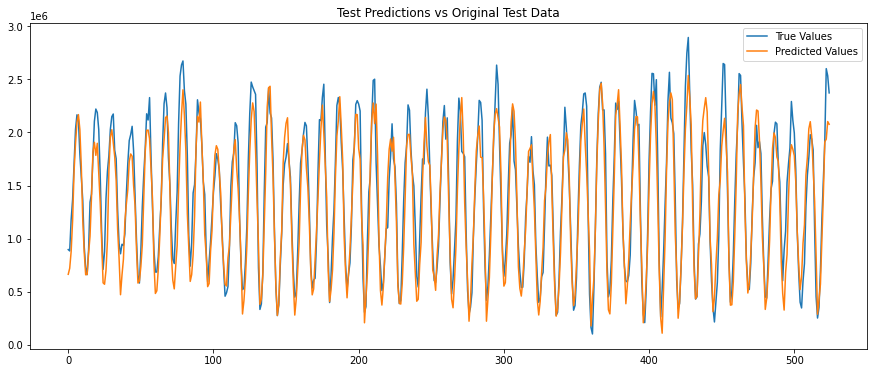

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()